In [1]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

# Intervalo de confiança

In [2]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [3]:
n = len(dados)
n

100

In [4]:
media = np.mean(dados)
media

159.25

In [5]:
dp = np.std(dados)
dp

13.65

# Cálculo do intervalo de confiança - manual 

In [6]:
alpha = 0.05 / 2
alpha

0.025

In [7]:
1 - alpha

0.975

In [8]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [9]:
x_inferior = media - z * (dp / math.sqrt(n))
x_inferior

156.57464916110283

In [10]:
x_superior = media + z * (dp / math.sqrt(n))
x_superior

161.92535083889717

In [11]:
marg_erro = abs(media - x_superior)
marg_erro

2.675350838897174

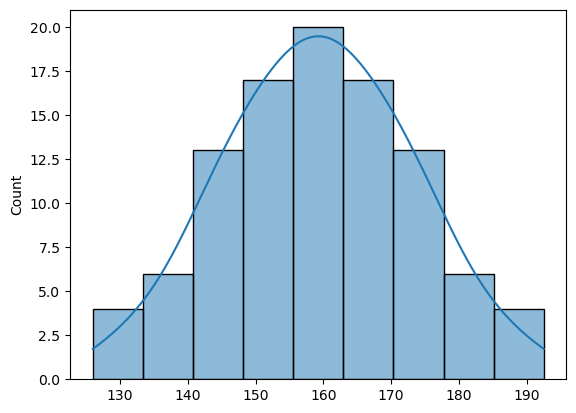

In [12]:
sns.histplot(dados, kde = True);

# Cálculo do intervalo de confiança - scipy 

In [13]:
stats.sem(dados) #Cálcular o erro padrão na base de dados

1.3718766178288244

In [14]:
dp / math.sqrt(n - 1)

1.3718766178288246

In [15]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(156.5611712378229, 161.9388287621771)

In [16]:
marg_erro - media - intervalos[0]
marg_erro

2.675350838897174

# Diferentes níveis de confiança 

In [17]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [18]:
marg_erro = media - intervalos[0]
marg_erro

3.5337199930570478

In [19]:
intervalos = norm.interval(0.8, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [20]:
marg_erro = media - intervalos[0]
marg_erro

1.7581306273125676

#  Distribuição T Student

In [21]:
dados = np.array([149., 160., 147., 189., 175., 168., 156., 160., 152.])

In [22]:
n = len(dados)
n

9

In [23]:
media = dados.mean()
media

161.77777777777777

In [24]:
dp = np.std(dados)
dp

12.786953227391823

In [25]:
from scipy.stats import t

In [26]:
intervalos = t.interval(0.95, n - 1, media, stats.sem(dados, ddof = 0)) #ddof são os graus de liberdade
intervalos

(151.9488554388298, 171.60670011672573)

In [27]:
me = media - intervalos[0]
me

9.828922338947962

# Intervalos de confiança e classificação 

Accuracy

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [29]:
dataset = pd.read_csv('credit_data.csv')
dataset.dropna(inplace = True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [30]:
X = dataset.iloc[:,1:4].values
y = dataset.iloc[:,4].values

In [31]:
resultados_naive_bayes_cv = []
resultados_naive_bayes_cv_300 = []
resultados_logistica_cv = []
resultados_logistica_cv_300 = []
resultados_forest_cv = []
resultados_forest_cv_300 = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score (naive_bayes, X, y, cv = kfold)
    resultados_naive_bayes_cv_300.append(scores)
    resultados_naive_bayes_cv.append(scores.mean())
    
    logistica = LogisticRegression()
    scores = cross_val_score (logistica, X, y, cv = kfold)
    resultados_logistica_cv_300.append(scores)
    resultados_logistica_cv.append(scores.mean())
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv_300.append(scores)
    resultados_forest_cv.append(scores.mean())


In [32]:
len(resultados_naive_bayes_cv), len(resultados_naive_bayes_cv_300)

(30, 30)

In [34]:
print(resultados_naive_bayes_cv_300) #Em matriz

[array([0.91      , 0.93      , 0.96      , 0.925     , 0.94      ,
       0.895     , 0.965     , 0.89949749, 0.87939698, 0.94472362]), array([0.92      , 0.945     , 0.895     , 0.92      , 0.915     ,
       0.93      , 0.89      , 0.94974874, 0.93467337, 0.94974874]), array([0.93      , 0.89      , 0.94      , 0.935     , 0.905     ,
       0.935     , 0.935     , 0.91959799, 0.94472362, 0.91457286]), array([0.91      , 0.945     , 0.95      , 0.94      , 0.92      ,
       0.9       , 0.9       , 0.90954774, 0.91959799, 0.93467337]), array([0.96      , 0.93      , 0.94      , 0.905     , 0.935     ,
       0.93      , 0.905     , 0.90452261, 0.89949749, 0.93969849]), array([0.915     , 0.91      , 0.945     , 0.945     , 0.9       ,
       0.935     , 0.925     , 0.96482412, 0.89949749, 0.91457286]), array([0.955     , 0.935     , 0.915     , 0.94      , 0.905     ,
       0.9       , 0.925     , 0.92462312, 0.92462312, 0.91959799]), array([0.94      , 0.92      , 0.925     , 0.91

In [35]:
resultados_naive_bayes_cv = np.array(resultados_naive_bayes_cv)
resultados_naive_bayes_cv_300 = np.array(resultados_naive_bayes_cv_300).reshape(-1) #Transformar de 2 dimensões para 1
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_logistica_cv_300 = np.array(resultados_logistica_cv_300).reshape(-1)
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_forest_cv_300 = np.array(resultados_forest_cv_300).reshape(-1)

In [37]:
resultados_naive_bayes_cv_300.shape

(300,)

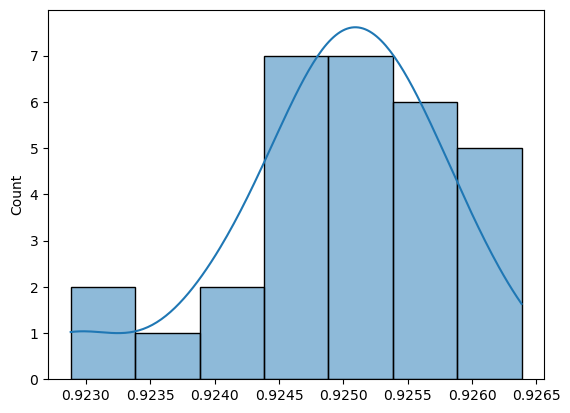

In [41]:
sns.histplot(resultados_naive_bayes_cv, kde = True);

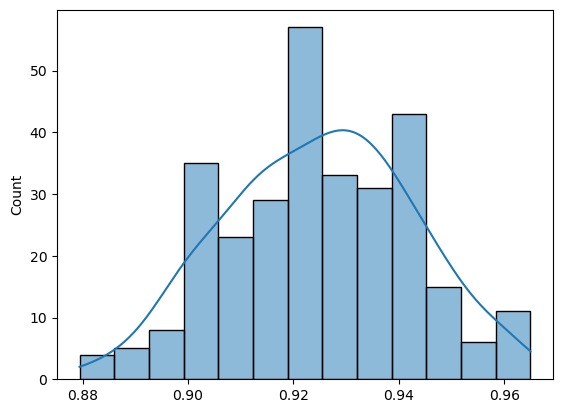

In [42]:
sns.histplot(resultados_naive_bayes_cv_300, kde = True);

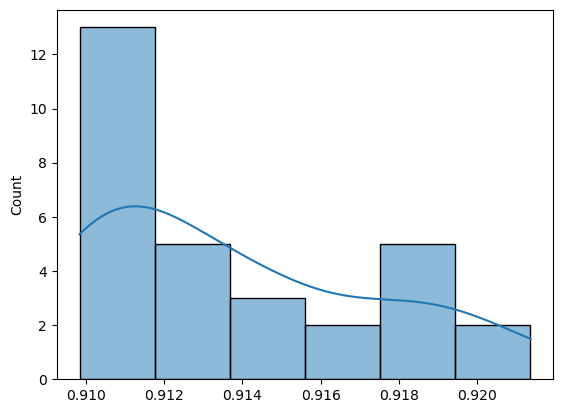

In [43]:
sns.histplot(resultados_logistica_cv, kde = True);

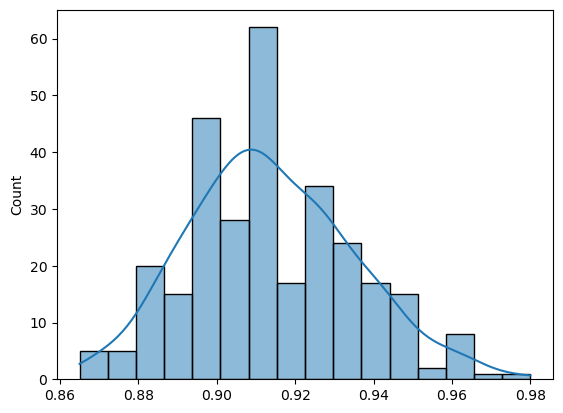

In [44]:
sns.histplot(resultados_logistica_cv_300, kde = True);

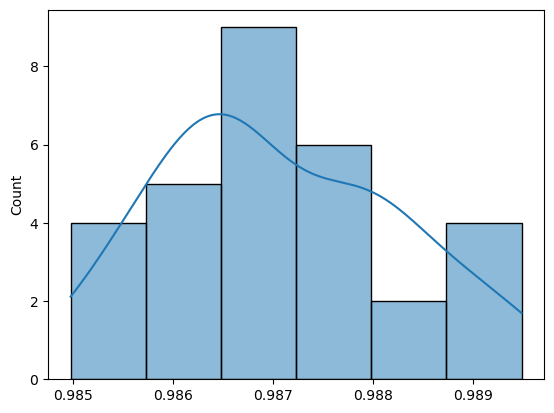

In [45]:
sns.histplot(resultados_forest_cv, kde = True);

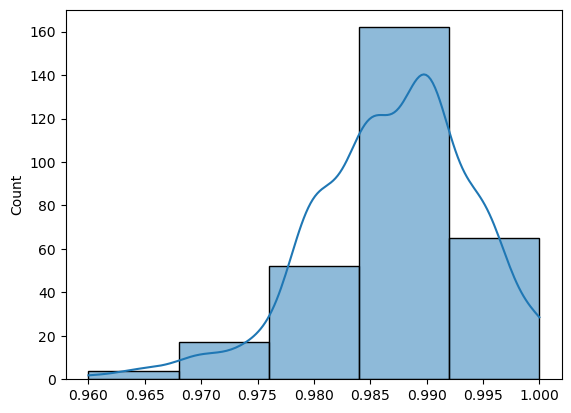

In [47]:
sns.histplot(resultados_forest_cv_300, bins = 5, kde = True);

In [49]:
resultados_naive_bayes_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9249359296482411, 0.9137817420435511, 0.9870641541038526)

In [50]:
stats.variation(resultados_naive_bayes_cv) * 100, stats.variation(resultados_logistica_cv) * 100, stats.variation(resultados_forest_cv) * 100

(0.08641071566366061, 0.38801026116292653, 0.11859271934099927)

# Intervalos de confiança

In [51]:
from scipy.stats import t
from scipy.stats import norm

Naive Bayes

In [52]:
intervalos_naive_bayes_t = t.interval(0.95, len(resultados_naive_bayes_cv) - 1, resultados_naive_bayes_cv.mean(), stats.sem(resultados_naive_bayes_cv, ddof = 0))
intervalos_naive_bayes_t

(0.9246374871248957, 0.9252343721715865)

In [53]:
abs(resultados_naive_bayes_cv.mean() - intervalos_naive_bayes_t[1])

0.0002984425233454324

In [54]:
intervalos_naive_bayes_n = norm.interval(0.95, resultados_naive_bayes_cv_300.mean(), stats.sem(resultados_naive_bayes_cv_300))
intervalos_naive_bayes_n

(0.9229333893644709, 0.9269384699320113)

In [55]:
abs( resultados_naive_bayes_cv_300.mean() - intervalos_naive_bayes_n[1])

0.0020025402837702266

Regressção Logística

In [59]:
intervalos_logistica_t = t.interval(0.95, len(resultados_logistica_cv) - 1, resultados_logistica_cv.mean(), stats.sem(resultados_logistica_cv, ddof = 0))
intervalos_logistica_t

(0.9124578055959317, 0.9151056784911705)

In [60]:
abs(resultados_logistica_cv.mean() - intervalos_logistica_t[1])

0.0013239364476194115

In [61]:
intervalos_logistica_n = norm.interval(0.95, resultados_logistica_cv_300.mean(), stats.sem(resultados_logistica_cv_300))
intervalos_logistica_n

(0.9114192660020396, 0.9161442180850629)

In [67]:
abs(resultados_logistica_cv_300.mean() - intervalos_logistica_n[1])

0.0023624760415116297

Random Forest

In [65]:
intervalos_forest_t = t.interval(0.95, len(resultados_forest_cv) - 1, resultados_forest_cv.mean(), stats.sem(resultados_forest_cv, ddof = 0))
intervalos_forest_t

(0.9866270500249563, 0.9875012581827489)

In [66]:
abs(resultados_forest_cv.mean() - intervalos_forest_t[1])

0.0004371040788962999

In [64]:
intervalos_forest_n = norm.interval(0.95, resultados_forest_cv_300.mean(), stats.sem(resultados_forest_cv_300))
intervalos_forest_n

(0.9862584070501416, 0.9878699011575637)

In [68]:
abs(resultados_forest_cv_300.mean() - intervalos_forest_n[1])

0.0008057470537110589

Temos 95% de confiança que a média de acertos do Random Forest está no intervalo entre 98,63% e 98,74% - 98,59% e 98,77%